### Regresson Project: Regression Model to predict housing prices

Team:
- Alen Pavlic Ravser
- Chuk Leng Lim
- Dennis Nkansah-Tieku
- Sebastian Guenther

### Importing Reguired Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import datetime

from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Data Load

In [2]:
## Reading a csv file into the notebook and assigning the file as 'data'

data = pd.read_csv('regression_data_clean.csv')

In [3]:
## Checking for the individual columns in the table

data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### DATA EXPLORATION 

The aim of this section is to be able to understand and have a good overview of the individual variables

In [4]:
# checking no. of rows against columns

data.shape

(21597, 21)

In [5]:
# Checking type

data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [6]:
#numerical data types selection

data.select_dtypes(include=np.number)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


In [7]:
# data other than numerical
data.select_dtypes(exclude=np.number)

,date
0,10/13/14
1,12/9/14
2,2/25/15
3,12/9/14
4,2/18/15
5,5/12/14
6,6/27/14
7,1/15/15
8,4/15/15
9,3/12/15


In [8]:
#Checking for null values

pd.isnull(data).any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

### Separate to categorical / numerical variables


In [9]:
data['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
2044500213    2
4222310010    2
8651402750    2
8820903380    2
4345000510    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
1139600270    2
937000330     2
3293700496    2
4435000705    2
5430300171    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420,

In [10]:
# dropping id of the houses since this is just a special referencing field and plays no role in the price of the House

data = data.drop(['id'], axis = 1)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [11]:
## Checking for individualcolumn value counts using a loop.

for i, cols in enumerate(data):
    print(data[cols].value_counts())

6/23/14     142
6/25/14     131
6/26/14     131
7/8/14      127
4/27/15     126
3/25/15     123
7/9/14      121
4/14/15     121
4/28/15     121
4/22/15     121
4/21/15     119
6/24/14     119
10/28/14    117
8/26/14     117
7/14/14     116
5/20/14     116
7/1/14      115
8/20/14     114
4/29/15     113
6/17/14     113
4/8/15      112
7/29/14     112
5/28/14     111
7/16/14     111
4/23/15     110
8/5/14      109
8/25/14     109
3/27/15     109
6/20/14     107
8/11/14     107
           ... 
9/28/14       3
11/29/14      3
8/31/14       3
5/11/14       2
2/1/15        2
5/10/15       2
7/4/14        2
11/28/14      2
12/27/14      2
10/11/14      2
9/7/14        2
8/9/14        2
8/24/14       2
12/7/14       2
12/21/14      2
11/15/14      2
2/15/15       1
5/15/15       1
5/24/15       1
11/30/14      1
5/27/15       1
8/30/14       1
1/31/15       1
7/27/14       1
1/10/15       1
5/17/14       1
1/17/15       1
8/3/14        1
3/8/15        1
11/2/14       1
Name: date, Length: 372,

## Based on the study from the value_counts, the following decisions were taken

- The following variables will be treated as categorical variables [bedrooms, bathrooms, floors, waterfront, view, condition, grade, lat, long, zipcode]
- Group bathrooms into the nearest whole number of fraction
- Group lat and long into four(4) major groupings
- Convert the date of sale to month and year



In [12]:
# changing numerical to categorical object

data['bedrooms'] = data['bedrooms'].astype('object')
data['bathrooms'] = data['bathrooms'].astype('object')
data['floors'] = data['floors'].astype('object')
data['waterfront'] = data['waterfront'].astype('object')
data['view'] = data['view'].astype('object')
data['condition'] = data['condition'].astype('object')
data['grade'] = data['grade'].astype('object')
data['lat'] = data['lat'].astype('object')
data['long'] = data['long'].astype('object')
data['zipcode'] = data['zipcode'].astype('object')

In [13]:
# adding lat_long by grouping lat and long to 4 bins

latbins = pd.cut(data.lat, 4, labels=[f'lat{k}' for k in range(1,4+1)], retbins=True)
longbins = pd.cut(data.long, 4, labels=[f'long{k}' for k in range(1,4+1)], retbins=True)

data['lat_long'] = [f'{latbins[0][row]}_{longbins[0][row]}' for row in data.index]

In [14]:
# changing lat_long to categorical and dropping lat, long

data['lat_long'] = data['lat_long'].astype('object')
data = data.drop(['lat','long'], axis = 1)

In [15]:
# converting datetime to year and month as object

data["date"] = pd.to_datetime(data["date"]).dt.strftime("%y%m")
data['date'] = data['date'].astype('object')

In [16]:
data.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,lat_long
0,1410,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,lat3_long1
1,1412,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000,lat4_long1
2,1502,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,lat4_long1
3,1412,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000,lat3_long1
4,1502,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,lat3_long2


categorical = data.select_dtypes(include=np.object)
categorical

numerical = data.select_dtypes(exclude=np.object)
numerical

In [17]:
## Checking for the shape
data.shape

(21597, 19)

9 Numerical: sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15, pirce
    
10 Categorical: date, bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode, lat_long

In [18]:
# bedrooms
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [19]:
data[data['bedrooms']== 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,lat_long
15856,1406,33,1.75,1620,6000,1,0,0,5,7,1040,580,1947,0,98103,1330,4700,640000,lat4_long1


Observation: There seems to be an irregularity, with a house of 33 bedrooms to have 1.75 bathrooms, and selling for 640000$ in this case we delete the record where bedrooms is 33.

In [20]:
#removing outlier, dropping a row

data=data.drop(data['bedrooms'].index[15856])

In [21]:
data['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6, 7, 8, 9, 11, 10], dtype=object)

In [22]:
#bathrooms
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.75       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [23]:
# function round up to 0.5
def round_of_bathrooms(num):
    return round(num*2)/2

data['bathrooms'] = list(map(round_of_bathrooms, data['bathrooms']))

In [24]:
data['bathrooms'] = data['bathrooms'].astype('object')
data['bathrooms'].value_counts()

2.0    7024
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

In [25]:
categorical = data.select_dtypes(include=np.object)
categorical.head(5)

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat_long
0,1410,3,1,1,0,0,3,7,98178,lat3_long1
1,1412,3,2,2,0,0,3,7,98125,lat4_long1
2,1502,2,1,1,0,0,3,6,98028,lat4_long1
3,1412,4,3,1,0,0,5,7,98136,lat3_long1
4,1502,3,2,1,0,0,3,8,98074,lat3_long2


In [26]:
numerical = data.select_dtypes(exclude=np.object)
numerical.head(5)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1955,0,1340,5650,221900
1,2570,7242,2170,400,1951,1991,1690,7639,538000
2,770,10000,770,0,1933,0,2720,8062,180000
3,1960,5000,1050,910,1965,0,1360,5000,604000
4,1680,8080,1680,0,1987,0,1800,7503,510000


In [27]:
numerical.dtypes

sqft_living      int64
sqft_lot         int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
sqft_living15    int64
sqft_lot15       int64
price            int64
dtype: object

In [28]:
## Checking the measures of Central Tendency

exploratory = numerical.describe().T
exploratory['iqr'] = exploratory['75%']-exploratory['25%']
exploratory['mean'] = list(map(lambda x: round(x,2), exploratory['mean']))
exploratory

,count,mean,std,min,25%,50%,75%,max,iqr
sqft_living,21596.0,2080.34,918.122038,370.0,1430.0,1910.0,2550.0,13540.0,1120.0
sqft_lot,21596.0,15099.83,41413.549419,520.0,5040.0,7619.0,10685.5,1651359.0,5645.5
sqft_above,21596.0,1788.63,827.763251,370.0,1190.0,1560.0,2210.0,9410.0,1020.0
sqft_basement,21596.0,291.71,442.673703,0.0,0.0,0.0,560.0,4820.0,560.0
yr_built,21596.0,1971.00,29.375460,1900.0,1951.0,1975.0,1997.0,2015.0,46.0
yr_renovated,21596.0,84.47,401.830330,0.0,0.0,0.0,0.0,2015.0,0.0
sqft_living15,21596.0,1986.65,685.231768,399.0,1490.0,1840.0,2360.0,6210.0,870.0
sqft_lot15,21596.0,12758.66,27275.018316,651.0,5100.0,7620.0,10083.0,871200.0,4983.0
price,21596.0,540291.96,367376.019328,78000.0,322000.0,450000.0,645000.0,7700000.0,323000.0


In [29]:
categorical.dtypes

date          object
bedrooms      object
bathrooms     object
floors        object
waterfront    object
view          object
condition     object
grade         object
zipcode       object
lat_long      object
dtype: object

In [30]:
mask = np.zeros_like(numerical.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Heatmap to show the correlation between the dependent variables and the independent variable

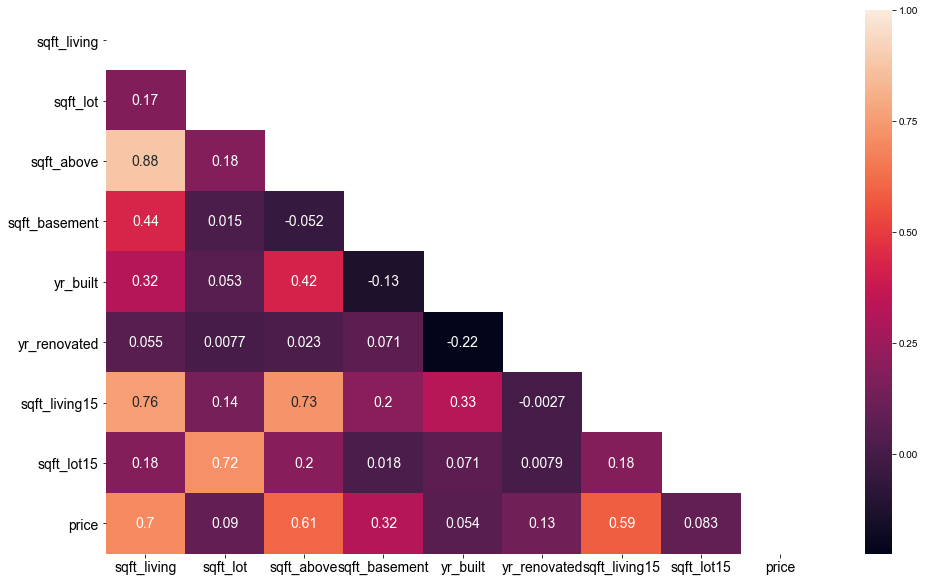

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(numerical.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Correlation plot between the target variable: price (independent) and the dependent variaables

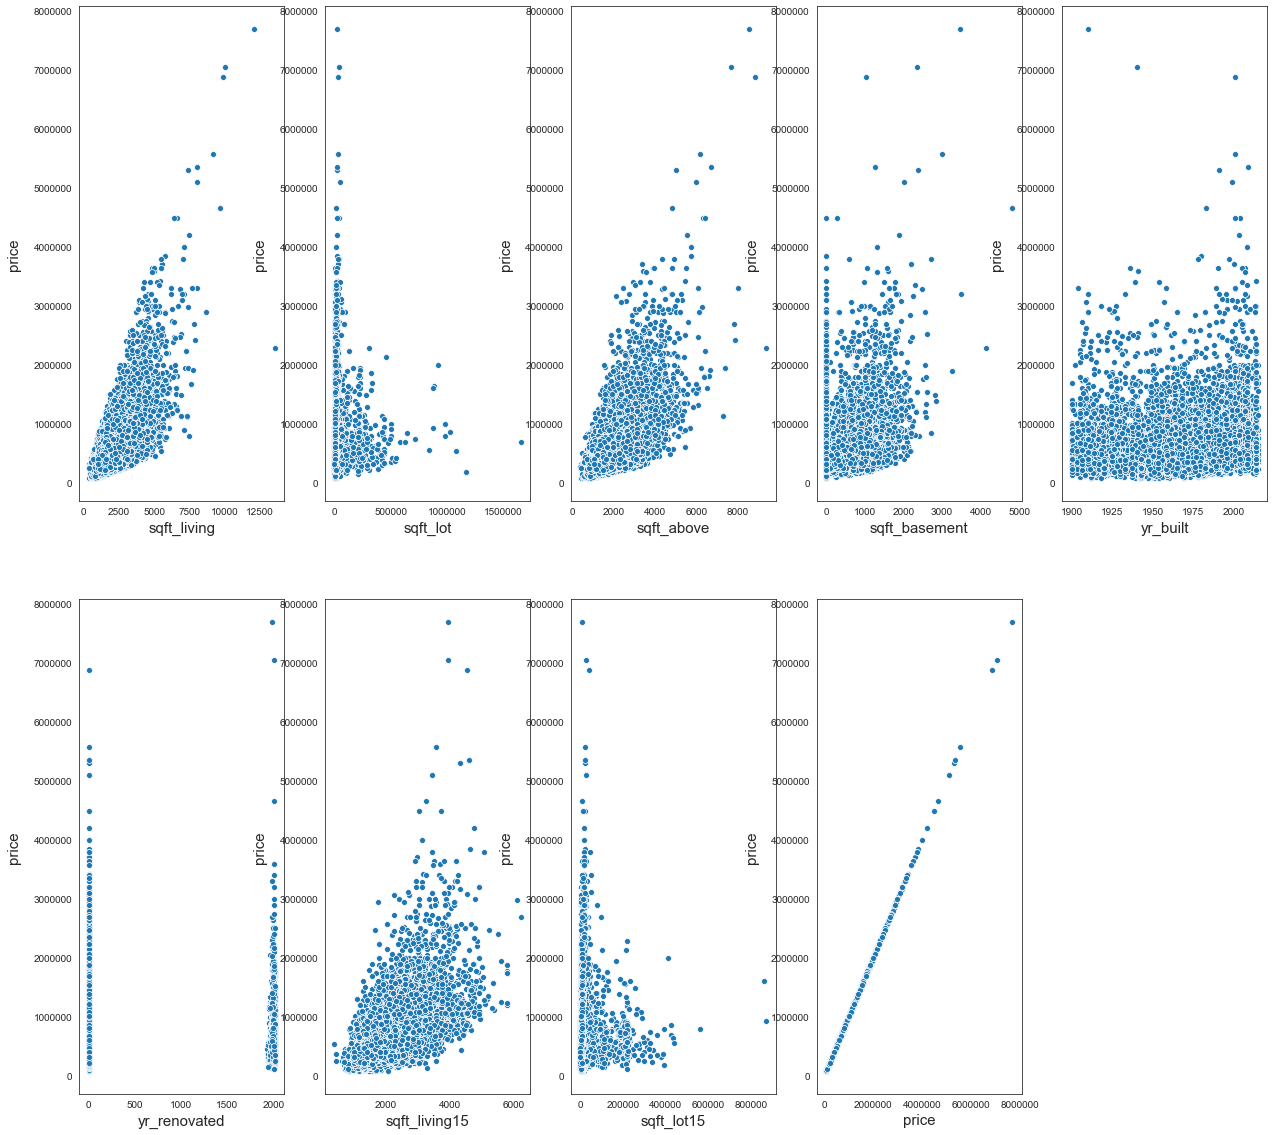

In [32]:
#numerical
fig,axs = plt.subplots(ncols=3, nrows=3, figsize =(12, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(numerical, 1):    
    plt.subplot(2, 5, i)
    sns.scatterplot(x=feature, y='price',  cmap = 'seismic', data=numerical)
    plt.xlabel('{}'.format(feature), size=15)
    plt.ylabel('price', size=15, labelpad=12.5)
plt.show() 

## Encoding

In [33]:
#encoding
categorical

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,lat_long
0,1410,3,1,1,0,0,3,7,98178,lat3_long1
1,1412,3,2,2,0,0,3,7,98125,lat4_long1
2,1502,2,1,1,0,0,3,6,98028,lat4_long1
3,1412,4,3,1,0,0,5,7,98136,lat3_long1
4,1502,3,2,1,0,0,3,8,98074,lat3_long2
5,1405,4,4.5,1,0,0,3,11,98053,lat4_long2
6,1406,3,2,2,0,0,3,7,98003,lat1_long1
7,1501,3,1.5,1,0,0,3,7,98198,lat2_long1
8,1504,3,1,1,0,0,3,7,98146,lat3_long1
9,1503,3,2.5,2,0,0,3,7,98038,lat2_long2


In [34]:
# separate category to 8 cats1 and 2 cats2 for different encoding

cats1 = pd.DataFrame()
cats1 = categorical[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view','condition','grade','date']]
cats1.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,date
0,3,1,1,0,0,3,7,1410
1,3,2,2,0,0,3,7,1412
2,2,1,1,0,0,3,6,1502
3,4,3,1,0,0,5,7,1412
4,3,2,1,0,0,3,8,1502


In [35]:
# cats1 for ordinal encoding

enc = OrdinalEncoder()
enc.fit_transform(cats1[['bedrooms','bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'date']])
cats1.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,date
0,3,1,1,0,0,3,7,1410
1,3,2,2,0,0,3,7,1412
2,2,1,1,0,0,3,6,1502
3,4,3,1,0,0,5,7,1412
4,3,2,1,0,0,3,8,1502


In [36]:
# cats2 consists of zipcode and lat_long

cats2 = pd.DataFrame()
cats2[['zipcode','lat_long']] =categorical[['zipcode', 'lat_long']]
cats2.head()

,zipcode,lat_long
0,98178,lat3_long1
1,98125,lat4_long1
2,98028,lat4_long1
3,98136,lat3_long1
4,98074,lat3_long2


In [37]:
cats2=pd.get_dummies(data=cats2,drop_first=True)
cats2.head(5)

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,lat_long_lat2_long2,lat_long_lat2_long3,lat_long_lat2_long4,lat_long_lat3_long1,lat_long_lat3_long2,lat_long_lat3_long3,lat_long_lat4_long1,lat_long_lat4_long2,lat_long_lat4_long3,lat_long_lat4_long4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
# concat cats 1 and cats 2
cat_full = pd.concat([cats2, cats1], axis =1)
cat_full.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,lat_long_lat4_long3,lat_long_lat4_long4,bedrooms,bathrooms,floors,waterfront,view,condition,grade,date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,3,1,1,0,0,3,7,1410
1,0,0,0,0,0,0,0,0,0,0,...,0,0,3,2,2,0,0,3,7,1412
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,3,6,1502
3,0,0,0,0,0,0,0,0,0,0,...,0,0,4,3,1,0,0,5,7,1412
4,0,0,0,0,0,0,0,0,0,0,...,0,0,3,2,1,0,0,3,8,1502


In [39]:
numerical

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1955,0,1340,5650,221900
1,2570,7242,2170,400,1951,1991,1690,7639,538000
2,770,10000,770,0,1933,0,2720,8062,180000
3,1960,5000,1050,910,1965,0,1360,5000,604000
4,1680,8080,1680,0,1987,0,1800,7503,510000
5,5420,101930,3890,1530,2001,0,4760,101930,1230000
6,1715,6819,1715,0,1995,0,2238,6819,257500
7,1060,9711,1060,0,1963,0,1650,9711,291850
8,1780,7470,1050,730,1960,0,1780,8113,229500
9,1890,6560,1890,0,2003,0,2390,7570,323000


In [40]:
## Sorting the data variable from the dataframe and dropping it afterwards

prices = numerical['price']
numerical.drop(['price'], axis = 1, inplace = True)
numerical.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1180,5650,1180,0,1955,0,1340,5650
1,2570,7242,2170,400,1951,1991,1690,7639
2,770,10000,770,0,1933,0,2720,8062
3,1960,5000,1050,910,1965,0,1360,5000
4,1680,8080,1680,0,1987,0,1800,7503


In [41]:
## Concatenating the Numerical and categorical dataframes

data_full = pd.concat([numerical, cat_full], axis =1)
data_full.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,...,lat_long_lat4_long3,lat_long_lat4_long4,bedrooms,bathrooms,floors,waterfront,view,condition,grade,date
0,1180,5650,1180,0,1955,0,1340,5650,0,0,...,0,0,3,1,1,0,0,3,7,1410
1,2570,7242,2170,400,1951,1991,1690,7639,0,0,...,0,0,3,2,2,0,0,3,7,1412
2,770,10000,770,0,1933,0,2720,8062,0,0,...,0,0,2,1,1,0,0,3,6,1502
3,1960,5000,1050,910,1965,0,1360,5000,0,0,...,0,0,4,3,1,0,0,5,7,1412
4,1680,8080,1680,0,1987,0,1800,7503,0,0,...,0,0,3,2,1,0,0,3,8,1502


In [42]:
#Training and Test Dataset Split

features = data_full

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.30, random_state=10)

# % of training set
len(X_train)/len(features)

0.6999907390257455

In [43]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.3000092609742545

In [44]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.8139314764574253
Test data r-squared: 0.8025408803560472
Intercept 247848.4214288959


,coef
sqft_living,1.092836e+02
sqft_lot,2.688085e-01
sqft_above,9.058747e+01
sqft_basement,1.869613e+01
yr_built,-6.297547e+02
yr_renovated,1.636433e+01
sqft_living15,1.387365e+01
sqft_lot15,-1.896515e-01
zipcode_98002,4.081414e+04
zipcode_98003,-2.100417e+04


In [45]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const.astype(float))
results = model.fit()
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,247848.421417,0.111
sqft_living,109.283572,0.000
sqft_lot,0.268808,0.000
sqft_above,90.587507,0.000
sqft_basement,18.696171,0.000
yr_built,-629.754712,0.000
yr_renovated,16.364332,0.000
sqft_living15,13.873651,0.000
sqft_lot15,-0.189651,0.007
zipcode_98002,40814.144638,0.045


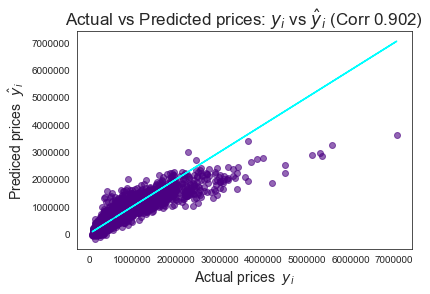

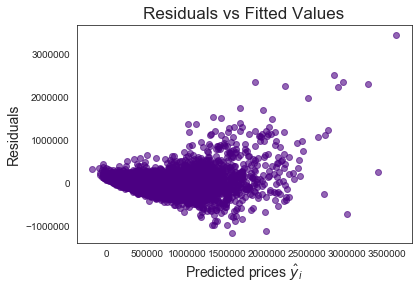

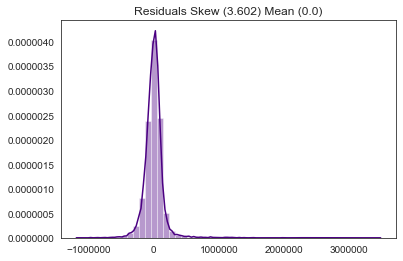

In [46]:
# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 3)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices  $y _i$', fontsize=14)
plt.ylabel('Prediced prices  $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


In [47]:
# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_mse

24946986935.267

In [48]:
full_normal_rsquared = round(results.rsquared, 3)
full_normal_rsquared

0.814

In [49]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)

0.8025408803560472

In [50]:
mse = mean_squared_error(y_test, predictions)
print(mse)

27449402244.06658


In [51]:
rmse = math.sqrt(mse)
print(rmse)

165678.61130534194
